ARCH and GARCH

In [1]:
pip install yfinance

In [2]:
pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 978.3/978.3 kB 11.8 MB/s eta 0:00:00


Example01:ARCH(1) model on S&P

In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from arch import arch_model

In [4]:
#Load S&P 500 daily data
data = yf.download('^GSPC', start='2020-01-01', end='2025-01-01')
returns = 100 * data['Close'].pct_change().dropna()

/tmp/ipython-input-4103008800.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('^GSPC', start='2020-01-01', end='2025-01-01')
[*********************100%***********************]  1 of 1 completed


In [5]:
#Step3:Fit ARCH(1) model
model = arch_model(returns, vol='ARCH',p=1)
fit = model.fit(disp='off')
print('Example 1 - ARCH(1) on S&P 500 Returns')
print(fit.summary())

Example 1 - ARCH(1) on S&P 500 Returns
                      Constant Mean - ARCH Model Results                      
Dep. Variable:                  ^GSPC   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -1974.89
Distribution:                  Normal   AIC:                           3955.79
Method:            Maximum Likelihood   BIC:                           3971.19
                                        No. Observations:                 1257
Date:                Sun, Sep 21 2025   Df Residuals:                     1256
Time:                        18:20:02   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1347  3.

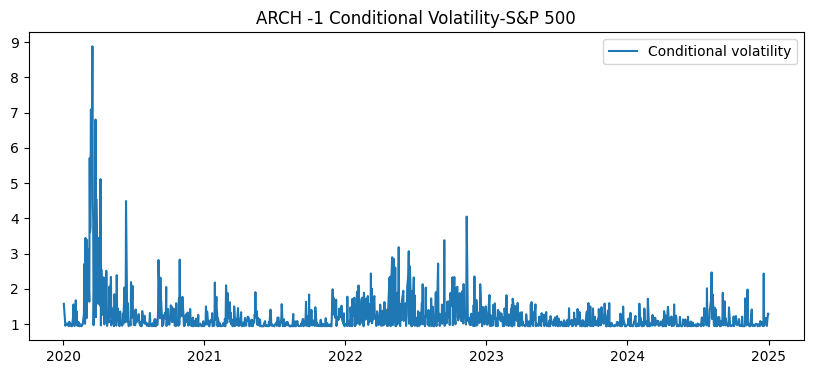

In [6]:
#Step4:Plot conditional volatility
plt.figure(figsize=(10, 4))
plt.plot(fit.conditional_volatility,label='Conditional volatility')
plt.title('ARCH -1 Conditional Volatility-S&P 500')
plt.legend()
plt.show()

Example02:GARCH(1,1) model on S&P returns

In [7]:
#Step1:Fit GARCH(1,1) model
model = arch_model(returns, vol='GARCH',p=1,q=1)
fit = model.fit(disp='off')
print('Example 2 - GARCH(1) on S&P 500 Returns')
print(fit.summary())

Example 2 - GARCH(1) on S&P 500 Returns
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  ^GSPC   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1832.95
Distribution:                  Normal   AIC:                           3673.91
Method:            Maximum Likelihood   BIC:                           3694.45
                                        No. Observations:                 1257
Date:                Sun, Sep 21 2025   Df Residuals:                     1256
Time:                        18:20:15   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0869  2

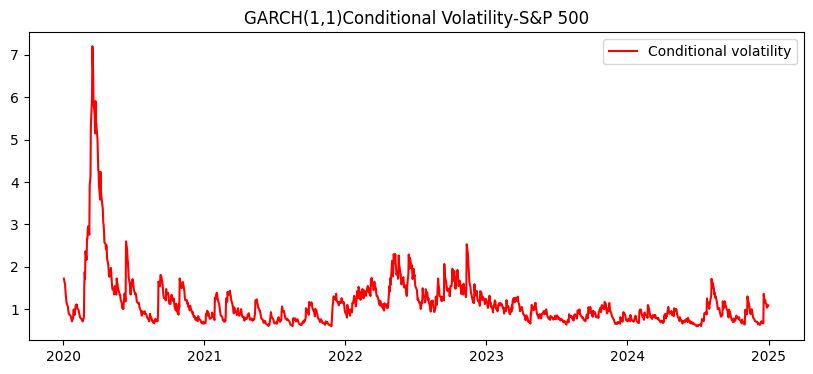

In [ ]:
#Step2:Plot  volatility
plt.figure(figsize=(10, 4))
plt.plot(fit.conditional_volatility,label='Conditional volatility',color='red')
plt.title('GARCH(1,1)Conditional Volatility-S&P 500')
plt.legend()
plt.show()

Example03 - GARCH(1,1) on gold prices

In [8]:
gold = yf.download('GLD', start='2020-01-01', end='2025-01-01')
gold_returns = 100 * gold['Close'].pct_change().dropna()

/tmp/ipython-input-1873386322.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  gold = yf.download('GLD', start='2020-01-01', end='2025-01-01')
[*********************100%***********************]  1 of 1 completed


In [9]:
model = arch_model(gold_returns, vol='GARCH',p=1,q=1)
fit = model.fit(disp='off')
print('Example 3 - GARCH(1,1) on Gold Prices')
print(fit.summary())

Example 3 - GARCH(1,1) on Gold Prices
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                    GLD   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1714.30
Distribution:                  Normal   AIC:                           3436.61
Method:            Maximum Likelihood   BIC:                           3457.15
                                        No. Observations:                 1257
Date:                Sun, Sep 21 2025   Df Residuals:                     1256
Time:                        18:20:22   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu             0.

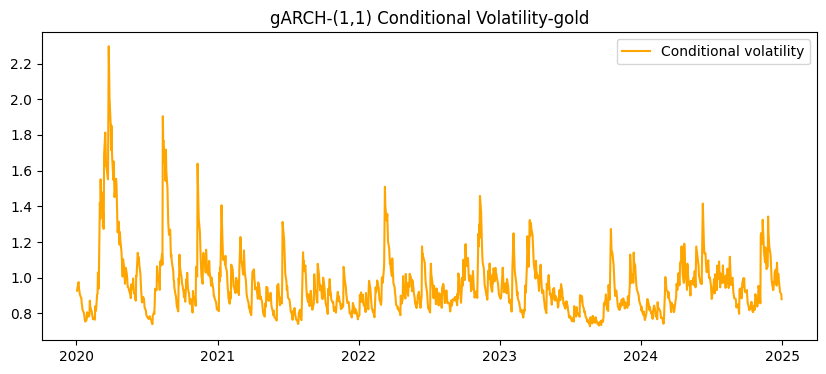

In [10]:
#Step4:Plot conditional volatility
plt.figure(figsize=(10, 4))
plt.plot(fit.conditional_volatility,label='Conditional volatility',color='orange')
plt.title('gARCH-(1,1) Conditional Volatility-gold')
plt.legend()
plt.show()

Example 04:GARCH with AR(1) mean(ARIMA+GARCH)

In [11]:
#Step1:Fit AR(1)-GARCH(1,1)
model = arch_model(returns, mean='AR',lags=1,vol='GARCH',p=1,q=1)
fit = model.fit(disp='off')
print('Example 4- AR(1)-GARCH(1,1) on S&P 500 returns')
print(fit.summary())

Example 4- AR(1)-GARCH(1,1) on S&P 500 returns
                           AR - GARCH Model Results                           
Dep. Variable:                  ^GSPC   R-squared:                       0.011
Mean Model:                        AR   Adj. R-squared:                  0.010
Vol Model:                      GARCH   Log-Likelihood:               -1831.10
Distribution:                  Normal   AIC:                           3672.20
Method:            Maximum Likelihood   BIC:                           3697.88
                                        No. Observations:                 1256
Date:                Sun, Sep 21 2025   Df Residuals:                     1254
Time:                        18:20:27   Df Model:                            2
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
Const   

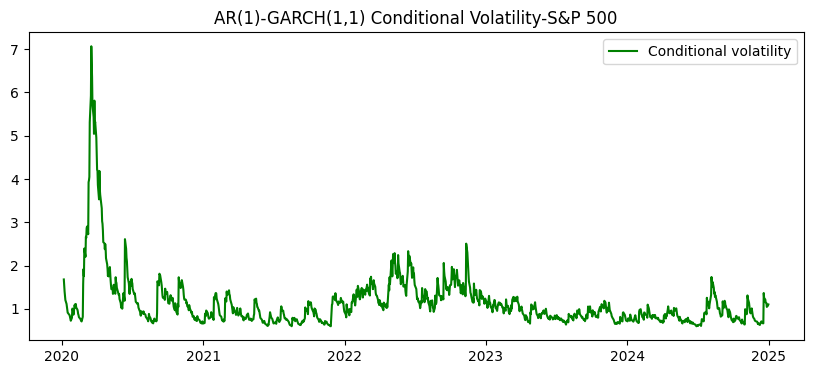

In [12]:
#Step2
plt.figure(figsize=(10, 4))
plt.plot(fit.conditional_volatility,label='Conditional volatility',color='green')
plt.title('AR(1)-GARCH(1,1) Conditional Volatility-S&P 500')
plt.legend()
plt.show()

Example05 : Comparing GARCH(1,1) vs GARCH(2,1)

In [13]:
#Step1
models =[(1,1),(2,1)]
results=[]


In [14]:
#Step2:
for p,q in models:
  model = arch_model(returns, vol='GARCH',p=p,q=q)
  fit = model.fit(disp='off')
  results.append({"Model":f"GARCH({p}{q})",
                  "AIC":fit.aic,
                  "BIC":fit.bic,
                  "LogLik":fit.loglikelihood})

In [15]:
#Step3:Print
df = pd.DataFrame(results)
print("\nExample5-Model comparison")
print(df)


Example5-Model comparison
       Model          AIC          BIC       LogLik
0  GARCH(11)  3673.907096  3694.453029 -1832.953548
1  GARCH(21)  3675.500570  3701.182986 -1832.750285


Example 06 - Simulate and Fit ARCH(1) model

In [16]:
#Step1:Simulate synthetic data
np.random.seed(42)
n = 500
eps = np.random.normal(size=n)
vol = np.zeros(n)
ret = np.zeros(n)
alpha0,alpha1 = 0.1,0.8 #Arch(1) parameters

for t in range(1,n):
  vol[t] = np.sqrt(alpha0 + alpha1 * ret[t-1]**2)
  ret[t] = vol[t] * eps[t]
series = pd.Series(ret)


In [17]:
#Step2:Fit ARCH(1) model
arch_fit = arch_model(series,vol='ARCH',p=1).fit(disp='off')
print('ARCH(1) Synthtic data')
print(arch_fit.summary())

ARCH(1) Synthtic data
                      Constant Mean - ARCH Model Results                      
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -310.574
Distribution:                  Normal   AIC:                           627.147
Method:            Maximum Likelihood   BIC:                           639.791
                                        No. Observations:                  500
Date:                Sun, Sep 21 2025   Df Residuals:                      499
Time:                        18:20:41   Df Model:                            1
                                  Mean Model                                  
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
mu         -6.0859e-03  1.577e

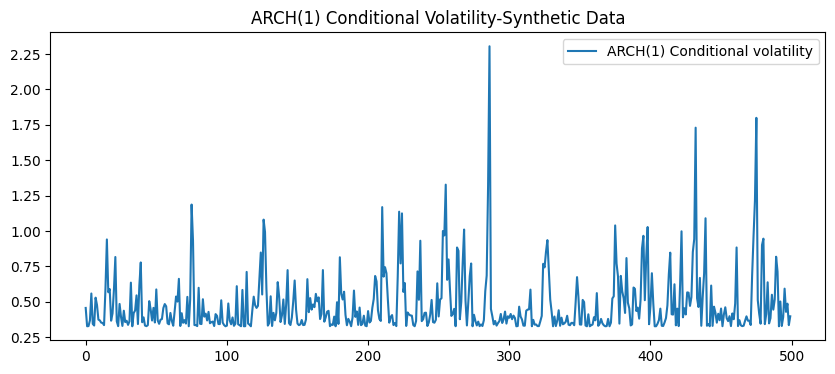

In [18]:
#Step3:Plot volatility
plt.figure(figsize=(10, 4))
plt.plot(arch_fit.conditional_volatility,label='ARCH(1) Conditional volatility')
plt.title('ARCH(1) Conditional Volatility-Synthetic Data')
plt.legend()
plt.show()


Example 07 : Simulate and fit GARCH(1,1) process

In [19]:
np.random.seed(123)
n = 500
eps = np.random.normal(size=n)
vol = np.zeros(n)
ret = np.zeros(n)
omega,alpha,beta = 0.05,0.1,0.85
for t in range(1,n):
  vol[t] = np.sqrt(omega + alpha*ret[t-1]**2 + beta*vol[t-1]**2 )
  ret[t] = vol[t] * eps[t]
series = pd.Series(ret)

In [20]:
#Fit GARCH(1,1)
garch_fit = arch_model(series,vol='GARCH',p=1,q=1).fit(disp='off')
print('GARCH(1,1) Synthetic Data')
print(garch_fit.summary())

GARCH(1,1) Synthetic Data
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -672.793
Distribution:                  Normal   AIC:                           1353.59
Method:            Maximum Likelihood   BIC:                           1370.44
                                        No. Observations:                  500
Date:                Sun, Sep 21 2025   Df Residuals:                      499
Time:                        18:20:49   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu            -0.0400  4.004e-02     -

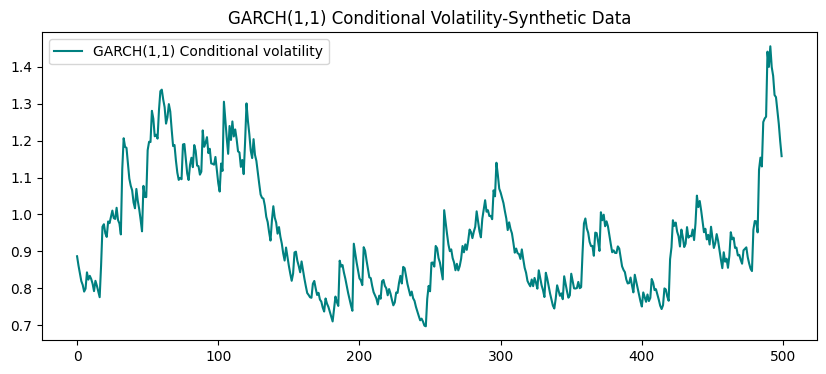

In [21]:
plt.figure(figsize=(10, 4))
plt.plot(garch_fit.conditional_volatility,label='GARCH(1,1) Conditional volatility',color='teal')
plt.title('GARCH(1,1) Conditional Volatility-Synthetic Data')
plt.legend()
plt.show()

Example 08:Compare ARCH(1) vs GARCH(1,1)

In [22]:
#Step1:Fit ARCH(1)
arch_fit = arch_model(series,vol='GARCH',p=1).fit(disp='off')
print('Model comparison on same synthetic data')
print("ARCH(1)-AIC:",arch_fit.aic,"BIC:",arch_fit.bic)
print("GARCH(1,1)-AIC:",garch_fit.aic,"BIC:",garch_fit.bic)


Model comparison on same synthetic data
ARCH(1)-AIC: 1353.5850430802452 BIC: 1370.443475473934
GARCH(1,1)-AIC: 1353.5850430802452 BIC: 1370.443475473934


Example 09:AR(1)-0GARCH(1,1)

In [23]:
#Step1:Generate AR(1)-GARCH(1,1) synthetic series
np.random.seed(99)
n = 500
eps = np.random.normal(size=n)
vol = np.zeros(n)
ret = np.zeros(n)

phi=0.3
omega,alpha,beta = 0.05,0.1,0.85
for t in range(1,n):
  vol[t] = np.sqrt(omega + alpha*ret[t-1]**2 + beta*vol[t-1]**2 )
  ret[t] = phi*ret[t-1]+vol[t] * eps[t]
series = pd.Series(ret)

In [24]:
#Fit AR(1)-GARCH(1,1)
ar_garch_fit = arch_model(series,mean='AR',lags=1,vol='GARCH',p=1,q=1).fit(disp='off')
print('AR(1)-GARCH(1,1) Synthetic Data')
print(ar_garch_fit.summary())

AR(1)-GARCH(1,1) Synthetic Data
                           AR - GARCH Model Results                           
Dep. Variable:                   None   R-squared:                       0.082
Mean Model:                        AR   Adj. R-squared:                  0.080
Vol Model:                      GARCH   Log-Likelihood:               -679.645
Distribution:                  Normal   AIC:                           1369.29
Method:            Maximum Likelihood   BIC:                           1390.35
                                        No. Observations:                  499
Date:                Sun, Sep 21 2025   Df Residuals:                      497
Time:                        18:21:01   Df Model:                            2
                                 Mean Model                                
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
Const          0.0228  3.958e

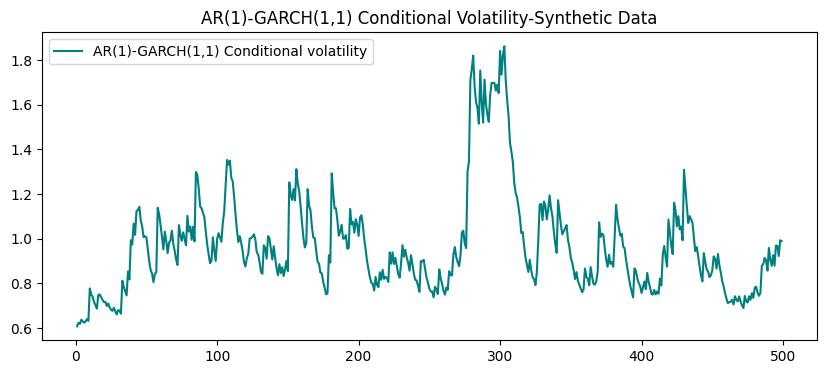

In [25]:
plt.figure(figsize=(10, 4))
plt.plot(ar_garch_fit.conditional_volatility,label='AR(1)-GARCH(1,1) Conditional volatility',color='teal')
plt.title('AR(1)-GARCH(1,1) Conditional Volatility-Synthetic Data')
plt.legend()
plt.show()

15th sep : Program1:ARIMA + ARCH on stock returns(daily)


In [26]:
import numpy as np
import pandas as pd
import yfinance as yf
from statsmodels.tsa.arima.model import ARIMA
from arch import arch_model
import matplotlib.pyplot as plt

In [27]:
#Step1:Load data
ticker='AAPL'
data = yf.download(ticker,start='2015-01-01',end='2023-12-31',progress=False)
data = data['Close'].dropna()

/tmp/ipython-input-3057696763.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker,start='2015-01-01',end='2023-12-31',progress=False)


In [28]:
#Step2: Compute returns(log-returns)
returns = np.log(data).diff().dropna()

In [29]:
#Step3:Fit ARIMA model on returns
arima_order = (1,0,1)
arima_model = ARIMA(returns,order=arima_order)
arima_res = arima_model.fit()
print(arima_res.summary())

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                   AAPL   No. Observations:                 2263
Model:                 ARIMA(1, 0, 1)   Log Likelihood                5850.032
Date:                Sun, 21 Sep 2025   AIC                         -11692.063
Time:                        18:21:15   BIC                         -11669.166
Sample:                             0   HQIC                        -11683.708
                               - 2263                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0009      0.000      2.472      0.013       0.000       0.002
ar.L1          0.0840      0.171      0.492      0.623      -0.251       0.419
ma.L1         -0.1602      0.173     -0.928      0.3

In [30]:
#Step4:Fit ARCH model
arch_model_obj = arch_model(arima_res.resid,vol='ARCH',p=1,o=0,q=0,dist='normal')
arch_res = arch_model_obj.fit(update_freq=5)
print(arch_res.summary())

Iteration:      5,   Func. Count:     37,   Neg. LLF: 1668181.0628504902
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5926.930532728087
            Iterations: 6
            Function evaluations: 45
            Gradient evaluations: 6
                      Constant Mean - ARCH Model Results                      
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:                5926.93
Distribution:                  Normal   AIC:                          -11847.9
Method:            Maximum Likelihood   BIC:                          -11830.7
                                        No. Observations:                 2263
Date:                Sun, Sep 21 2025   Df Residuals:                     2262
Time:                        18:21:18   Df Model:                            1
        

/usr/local/lib/python3.12/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0003328. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [31]:
#Step5:Mean + volatility
horizon = 5
arima_fore = arima_res.get_forecast(steps=horizon)
vol_fore = arch_res.forecast(horizon=horizon)
print("Mean forecast:\n",arima_fore.predicted_mean.tail(horizon))
print("Volatility forecast(variance):\n",vol_fore.variance.tail(horizon))

Mean forecast:
 2263    0.001379
2264    0.000949
2265    0.000913
2266    0.000910
2267    0.000909
Name: predicted_mean, dtype: float64
Volatility forecast(variance):
                  h.1       h.2       h.3       h.4       h.5
Date                                                        
2023-12-29  0.000264  0.000319  0.000332  0.000336  0.000337


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


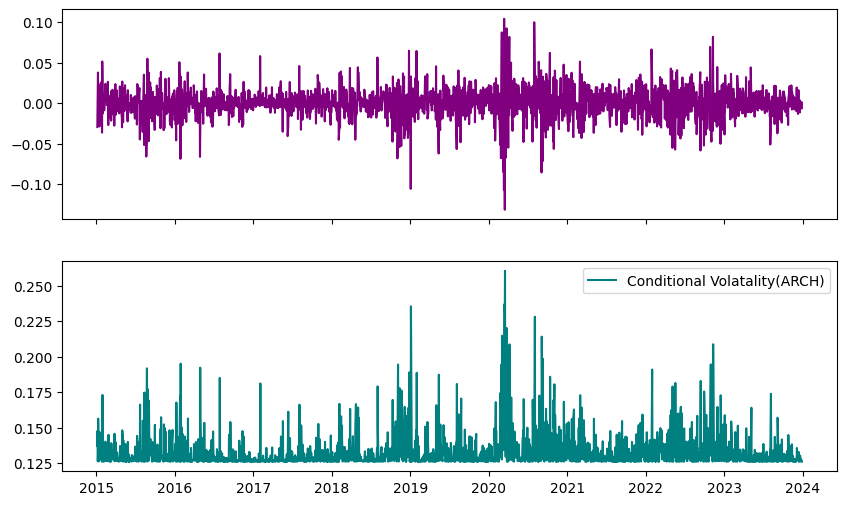

In [32]:
#Step6:Plot residuals and conditional volatility
fig,ax = plt.subplots(2,1,figsize=(10,6),sharex=True)
ax[0].plot(arima_res.resid,label='ARIMA residuals',color='purple')
ax[1].plot(np.sqrt(arch_res.conditional_volatility),label='Conditional Volatality(ARCH)',color='teal')
ax[1].legend()
plt.show()

Program2:ARIMA + ARCH on exchange rates of dollars and Euro

In [34]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from arch import arch_model
import matplotlib.pyplot as plt

In [37]:
#Step1:Load some exchange rate data
data = pd.read_csv('/content/eur-usd-historical-daily-data-test.csv',parse_dates=['timestamp'],index_col='timestamp')
close = data['close'].dropna()

In [38]:
#step 2: return series
returns = close.pct_change().dropna() * 100 #in percent
display(returns.head())

#step 3: stationarity check
adf = adfuller(returns)
print(f'ADF p-value: {adf[1]}')
#step 4: fit ARIMA on returns
model_arima = ARIMA(returns, order=(1, 0, 1))
result_arima = model_arima.fit()
print(result_arima.summary())

#step 5 arch
am = arch_model(result_arima.resid, vol='ARCH', p=1, o=0, q=0, dist='t')
res_arch = am.fit(update_freq=5)
print(res_arch.summary())

timestamp
2019-01-02   -1.081930
2019-01-03    0.493958
2019-01-04    0.008777
2019-01-06    0.087765
2019-01-07    0.622589
Name: close, dtype: float64

ADF p-value: 2.108737662178881e-05
                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                  254
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 -52.051
Date:                Sun, 21 Sep 2025   AIC                            112.102
Time:                        18:26:16   BIC                            126.251
Sample:                             0   HQIC                           117.794
                                - 254                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0109      0.018     -0.612      0.540      -0.046       0.024
ar.L1         -0.6645      0.320     -2.075      0.038      -1.292      -0.037
ma.L1          0.

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.08829. Parameter
estimation work better

Iteration:      5,   Func. Count:     31,   Neg. LLF: 239.85829737665728
Iteration:     10,   Func. Count:     61,   Neg. LLF: 48.611323057594326
Iteration:     15,   Func. Count:     88,   Neg. LLF: 40.867139680740216
Iteration:     20,   Func. Count:    113,   Neg. LLF: 40.865706730140204
Optimization terminated successfully    (Exit mode 0)
            Current function value: 40.865706730140204
            Iterations: 20
            Function evaluations: 113
            Gradient evaluations: 20
                         Constant Mean - ARCH Model Results                         
Dep. Variable:                         None   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                             ARCH   Log-Likelihood:               -40.8657
Distribution:      Standardized Student's t   AIC:                           89.7314
Method:                  Maximum Likelihood   BIC:                      

In [39]:
#Step6:Forecasting
steps=10
mean_fore = result_arima.get_forecast(steps=steps)
var_fore = res_arch.forecast(horizon=steps)
print("Forecasted returns:\n",mean_fore.predicted_mean.tail(steps))
print("Forecasted variance:\n",var_fore.variance.tail(steps))

Forecasted returns:
 254    0.007607
255   -0.023123
256   -0.002705
257   -0.016272
258   -0.007257
259   -0.013247
260   -0.009267
261   -0.011911
262   -0.010154
263   -0.011322
Name: predicted_mean, dtype: float64
Forecasted variance:
                 h.01      h.02      h.03      h.04      h.05      h.06  \
timestamp                                                                
2019-10-23  0.099527  0.105322  0.106051  0.106143  0.106155  0.106156   

                h.07      h.08      h.09      h.10  
timestamp                                           
2019-10-23  0.106157  0.106157  0.106157  0.106157  


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
